In [45]:
pip install Pickle

     ---------------------------------------- 7.2/7.2 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 957.2/957.2 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import numpy as np
import pandas as pd
from riotwatcher import LolWatcher,RiotWatcher, ApiError
import mwclient  
import csv
import json
import pickle
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.models




In [7]:
filename = 'LoLData.csv'
header = ['B1', 'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5', 'winner']
data = []
data_result = []

lol_watcher = LolWatcher('')
riot_watcher = RiotWatcher('')

In [51]:
site = mwclient.Site('lol.fandom.com', path='/')
response = site.api('cargoquery',
	limit = '500',
	tables = "PicksAndBansS7=PB, MatchSchedule=MS",
	fields = "MS.ShownName, PB.Team1Pick1, PB.Team2Pick1, PB.Team2Pick2, PB.Team1Pick2, PB.Team1Pick3, PB.Team2Pick3, PB.Team2Pick4, PB.Team1Pick4, PB.Team1Pick5, PB.Team2Pick5,  PB.Winner",
	where = "Patch='12.14' OR Patch='12.13' AND MS.Winner IS NOT NULL AND PB.Winner IS NOT NULL", #Results after Aug 1, 2019
    join_on = "PB.MatchId=MS.MatchId"
)

response1 = json.dumps(response)


Increased Rate limit 

In [4]:

region_list = ['LA2', 'RU']
match_ids = []
player_ids = []
for region in region_list:
    challenger_player_list = lol_watcher.league.challenger_by_queue(region, 'RANKED_SOLO_5x5' )
    #print(challenger_player_list)
    for player in challenger_player_list['entries']:
        id = lol_watcher.summoner.by_id(region, player['summonerId'])['puuid']
        match_history = lol_watcher.match.matchlist_by_puuid(region, id, count=20, queue=420, type='ranked')
        #print(match_history)
        for match in match_history:
            if not(match in match_ids):
                try: 
                    details = lol_watcher.match.by_id(region,match)
                except: 
                    print("Unauthorised")
                #print(details['info']['gameVersion'])
                match_details = []
                for player in details['info']['participants']:
                    match_details.append(player['championId'])
                winner = details['info']['teams'][0]['win']
                if winner == True:
                    match_details.append("0")
                else:
                    match_details.append("1")
                data.append(match_details)
                print(match)
                #print(match_details)



file = open('LolData1.csv', 'w', encoding='UTF8', newline='')
writer = csv.writer(file)
writer.writerow(header)
writer.writerows(data)
file.close()


LA2_1213452537
LA2_1213406648
LA2_1213411666
LA2_1213367767
LA2_1213383662
LA2_1213350489
LA2_1213327708
LA2_1212619071
LA2_1212623965
LA2_1212610011
LA2_1212595853
LA2_1212474007
LA2_1212419010
LA2_1212420837
LA2_1212396686
LA2_1212363125
LA2_1211087670
LA2_1211062839
LA2_1210999177
LA2_1210986005
LA2_1216562329
LA2_1216478502
LA2_1216240606
LA2_1216175546
LA2_1216129640
LA2_1216106376
LA2_1215567535
LA2_1215582127
LA2_1215548529
LA2_1214975888
LA2_1214945795
LA2_1214815743
LA2_1214740189
LA2_1214338091
LA2_1214332444
LA2_1214310302
LA2_1214272338
LA2_1214221179
LA2_1214209027
LA2_1214032486
LA2_1216669532
LA2_1216549363
LA2_1216464086
LA2_1214443891
LA2_1214254723
LA2_1214220288
LA2_1214139354
LA2_1214135228
LA2_1214076052
LA2_1214092842
LA2_1214048384
LA2_1214032486
LA2_1213999209
LA2_1214015555
LA2_1213415458
LA2_1212446657
LA2_1212453789
LA2_1212439201
LA2_1212361639
LA2_1212347688
LA2_1216454903
LA2_1216326233
LA2_1216334974
LA2_1216001361
LA2_1215293578
LA2_1215055095
LA2_121479

Split data into training/testing data 

25830
(8610, 10, 896)
(8610, 1)
Epoch 1/100
202/202 [==============================] - 4s 15ms/step - loss: 0.6931 - accuracy: 0.5024 - val_loss: 0.6930 - val_accuracy: 0.5067
Epoch 2/100
202/202 [==============================] - 3s 15ms/step - loss: 0.6928 - accuracy: 0.5135 - val_loss: 0.6928 - val_accuracy: 0.5123
Epoch 3/100
202/202 [==============================] - 3s 15ms/step - loss: 0.6925 - accuracy: 0.5188 - val_loss: 0.6925 - val_accuracy: 0.5127
Epoch 4/100
202/202 [==============================] - 3s 15ms/step - loss: 0.6922 - accuracy: 0.5221 - val_loss: 0.6924 - val_accuracy: 0.5154
Epoch 5/100
202/202 [==============================] - 3s 15ms/step - loss: 0.6920 - accuracy: 0.5286 - val_loss: 0.6923 - val_accuracy: 0.5082
Epoch 6/100
202/202 [==============================] - 3s 15ms/step - loss: 0.6917 - accuracy: 0.5268 - val_loss: 0.6919 - val_accuracy: 0.5238
Epoch 7/100
202/202 [==============================] - 3s 15ms/step - loss: 0.6915 - accuracy: 0.5326 - 

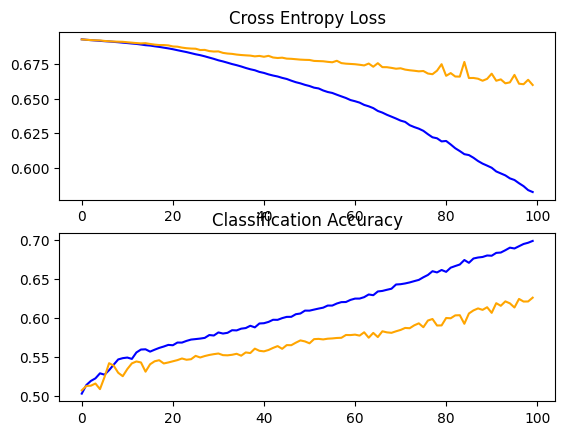

INFO:tensorflow:Assets written to: test_model\assets


INFO:tensorflow:Assets written to: test_model\assets


In [51]:
file = pd.read_csv(filename)
file = file.loc[:, header]
features = ['B1', 'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5']

x = file.loc[:, features]
y = file.loc[:, ['winner']]

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

print(len(X_train))

run_test_harness(X_train, y_train, X_test, y_test)


This method is used to predict new probabilities based on a set of champions. 

In [54]:
model = tensorflow.keras.models.load_model('test_model')
predict_data = to_categorical(np.array([[77,107,84,119,111,875,120,39,30,235],[58,76,20,35,89,21,11,121,107,360],[90,104,82,21,111,106,31,517,145,555],[83,131,238,711,147,58,245,157,498,35]]), num_classes=896)
#predict_data.reshape(1, 10, 896)
#input_array_for_prediction = np.expand_dims(predict_data,axis=0)
#print(input_array_for_prediction.shape)
print(model.predict(predict_data))

1/1 [==============================] - 0s 88ms/step
[[0.3908489 ]
 [0.28197226]
 [0.8442839 ]
 [0.27224854]]


In [46]:
def define_model():
    model = Sequential()
    model.add(Conv1D(filters = 64, kernel_size=1,strides = 1, activation='relu', padding='same', input_shape=(10, 896)))
    model.add(Conv1D(filters = 32, kernel_size=1,strides = 1, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2,strides=2, padding='valid'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(learning_rate=0.003, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [50]:
# run the test harness for evaluating a model

def run_test_harness(train, label_fine, test, tst_fine):
	# fit model
    #First number = number of entries
    train = to_categorical(train) 
    test = to_categorical(test)
    print(test.shape)
    print(tst_fine.shape)
    model = define_model()
    history = model.fit(train, label_fine, epochs=100, batch_size=128,  validation_data=(test, tst_fine), verbose=1)
    # evaluate model
    _, acc = model.evaluate(test, tst_fine, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    model.save('test_model')

# entry point, run the test harness


Need to re-learn what each of these methods are used for

In [13]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	pyplot.show()